# Heart Disease Prediction using Desicion Tree
## 23aiml019 - AnshGajera

**Objective:** Predict presence of heart disease using a Decision Tree classifier.

In [72]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [73]:
#Load the dataset
df = pd.read_csv('D:\\SEM6\\ADML Advance Machine Learning with Python\\Practicle2\\heart_disease_uci.csv')  
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [74]:
df.shape

(920, 16)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [76]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [77]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [78]:
(df.isnull().sum() / len(df)) * 100


id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [79]:
df.isnull().sum().sort_values(ascending=False)


ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
exang        55
thalch       55
chol         30
restecg       2
cp            0
dataset       0
id            0
age           0
sex           0
num           0
dtype: int64

In [80]:
# drop the features with more than 40% missing values
df.drop(columns=['ca', 'thal', 'slope'], inplace=True)
df.isnull().sum()

id           0
age          0
sex          0
dataset      0
cp           0
trestbps    59
chol        30
fbs         90
restecg      2
thalch      55
exang       55
oldpeak     62
num          0
dtype: int64

In [81]:
num_cols = ['oldpeak', 'trestbps', 'thalch', 'chol']

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
df.isnull().sum()


C:\Users\ANSH\AppData\Local\Temp\ipykernel_13992\4228350526.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\ANSH\AppData\Local\Temp\ipykernel_13992\4228350526.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

id           0
age          0
sex          0
dataset      0
cp           0
trestbps     0
chol         0
fbs         90
restecg      2
thalch       0
exang       55
oldpeak      0
num          0
dtype: int64

In [82]:
cat_cols = ['fbs', 'exang', 'restecg']

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.isnull().sum()

C:\Users\ANSH\AppData\Local\Temp\ipykernel_13992\1800075005.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\ANSH\AppData\Local\Temp\ipykernel_13992\1800075005.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(df[col].mode()[0], inplac

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64

# EDA

For binary classification, we convert this to:

0 → No disease

1 → Disease present

In [83]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

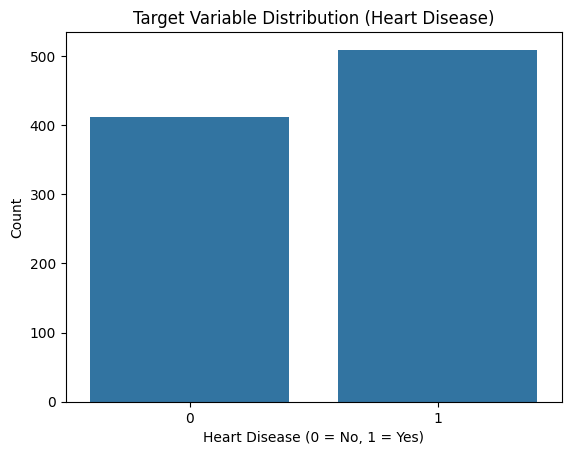

In [84]:
# Numerical Feature Distribution
sns.countplot(x='num', data=df)
plt.title("Target Variable Distribution (Heart Disease)")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()
X = df.drop('num', axis=1)
y = df['num']

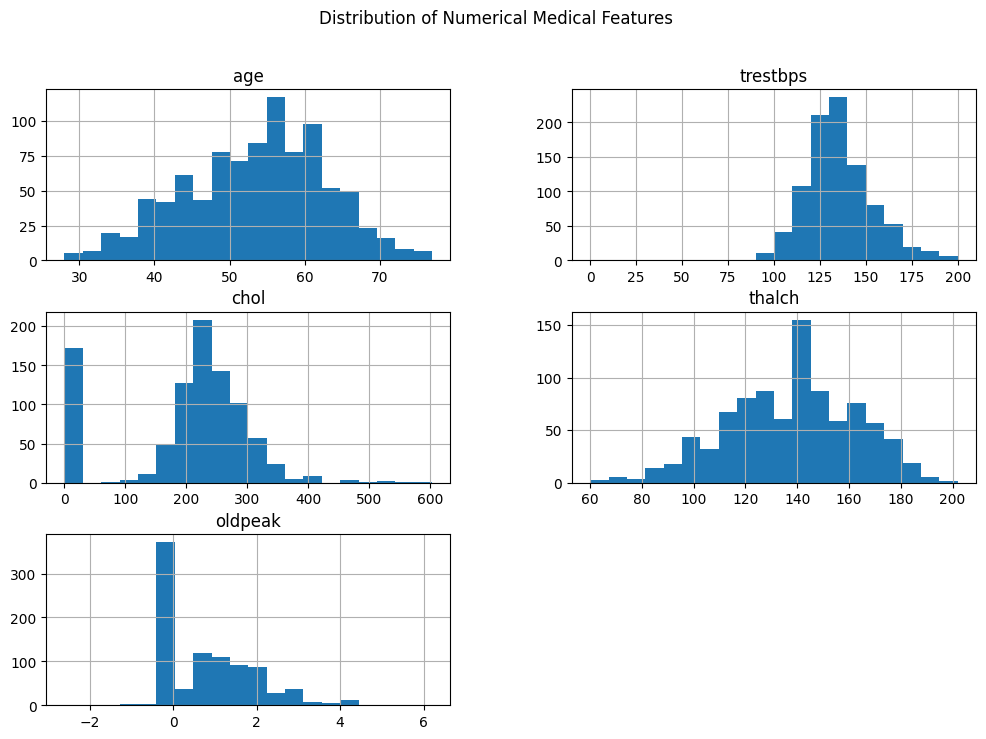

In [85]:
num_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

df[num_features].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribution of Numerical Medical Features")
plt.show()


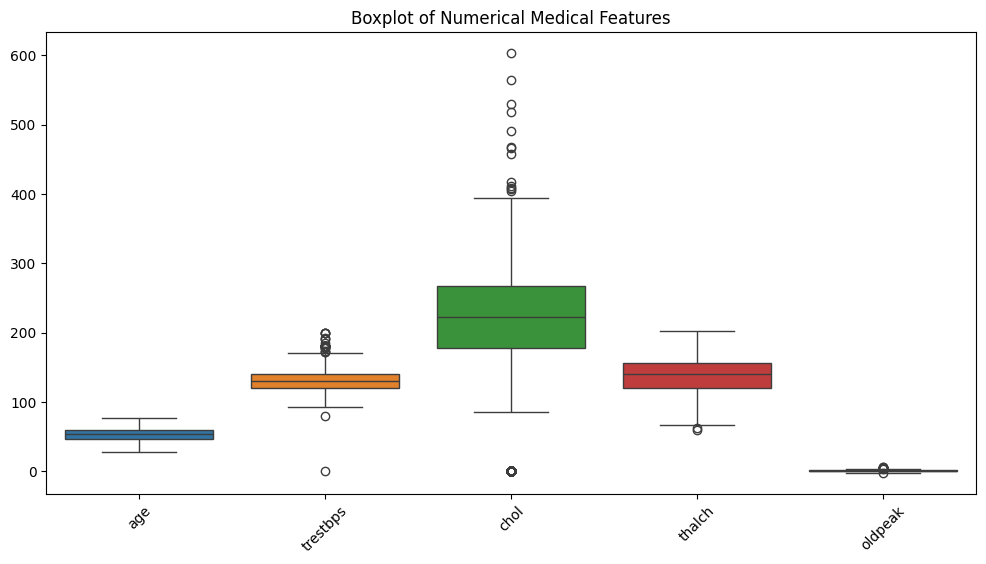

In [86]:
# Outlier Detection using Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_features])
plt.title("Boxplot of Numerical Medical Features")
plt.xticks(rotation=45)
plt.show()


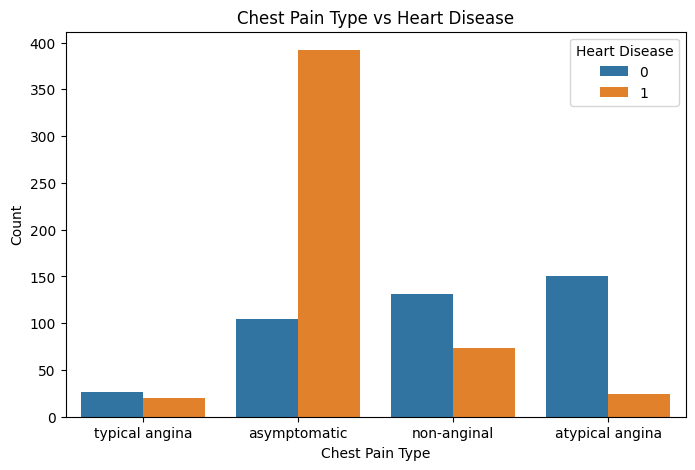

In [87]:
# Categorical Features vs Target Variable
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', hue='num', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()


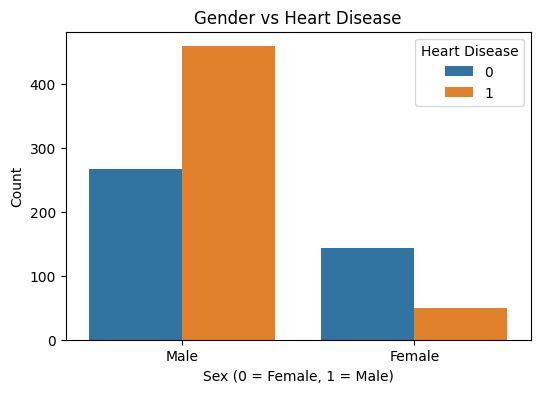

In [88]:
# Gender (sex) vs Heart Disease
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='num', data=df)
plt.title("Gender vs Heart Disease")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()


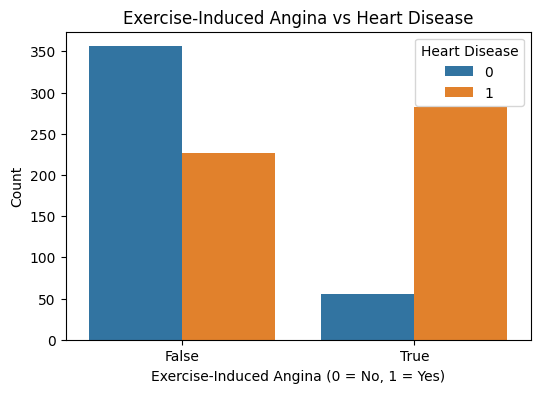

In [89]:
# Exercise-Induced Angina (exang) vs Heart Disease
plt.figure(figsize=(6, 4))
sns.countplot(x='exang', hue='num', data=df)
plt.title("Exercise-Induced Angina vs Heart Disease")
plt.xlabel("Exercise-Induced Angina (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()


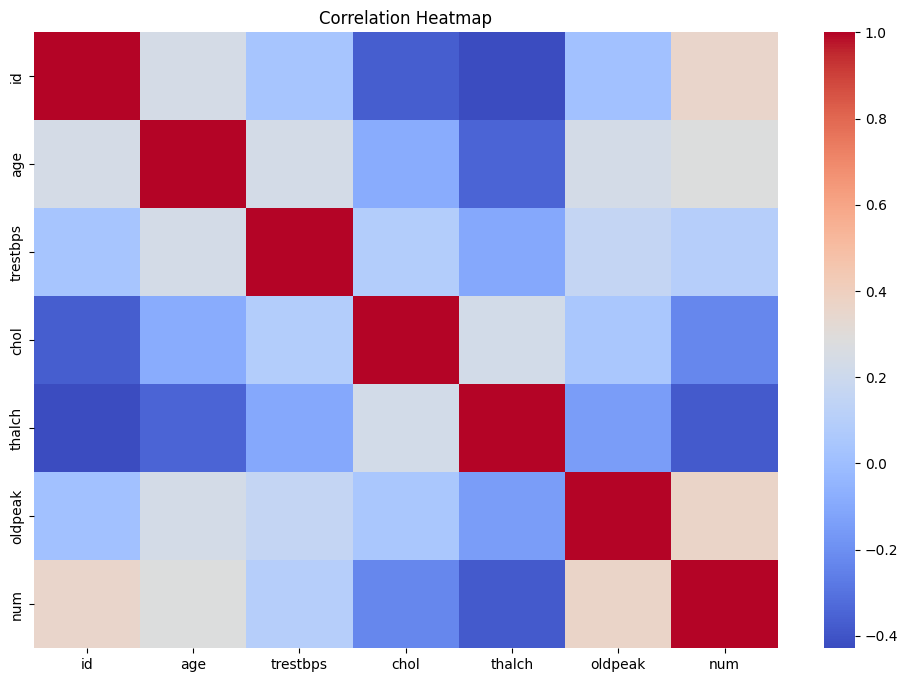

In [90]:
# Correlation Analysis (Numerical + Target)
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
df.drop(columns=['id'], inplace=True)
# drop dataset id column as it is not useful for analysis


In [92]:
df.columns

Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'num'],
      dtype='object')

In [93]:
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang']

numerical_features, categorical_features


(['age', 'trestbps', 'chol', 'thalch', 'oldpeak'],
 ['sex', 'cp', 'fbs', 'restecg', 'exang'])

In [94]:
#Encoding Categorical Variables
le = LabelEncoder()
for col in categorical_features:
    df[col] = le.fit_transform(df[col])

In [95]:
df[categorical_features].head()


,sex,cp,fbs,restecg,exang
0,1,3,1,0,0
1,1,0,0,0,1
2,1,0,0,0,1
3,1,2,0,1,0
4,0,1,0,0,0


In [96]:
# Create Feature Matrix (X) and Target Vector (y)
X = df.drop(columns=['num'])
y = df['num']


In [97]:
X.shape, y.shape


((920, 11), (920,))

In [98]:
# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [99]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((736, 11), (184, 11), (736,), (184,))

In [100]:
dt_baseline = DecisionTreeClassifier(random_state=42)

In [ ]:
X_train.dtypes


age           int64
sex           int64
dataset      object
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalch      float64
exang         int64
oldpeak     float64
dtype: object

In [102]:
X_train = X_train.drop(columns=['dataset'])
X_test = X_test.drop(columns=['dataset'])


In [105]:
dt_baseline.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [106]:
y_pred = dt_baseline.predict(X_test)


In [107]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.7663043478260869

In [108]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.73      0.74        82
           1       0.79      0.79      0.79       102

    accuracy                           0.77       184
   macro avg       0.76      0.76      0.76       184
weighted avg       0.77      0.77      0.77       184



“The baseline Decision Tree classifier achieved an accuracy of approximately 76.6%. The recall score for heart disease cases was 0.79, indicating that the model correctly identified the majority of patients with the condition. Given the medical context, recall was considered more critical than accuracy.”

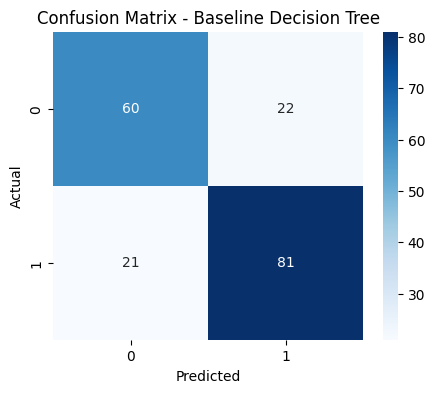

In [109]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Baseline Decision Tree")
plt.show()


Hyperparameter Tuning

In [110]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 2, 5, 10]
}


In [111]:
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)


In [112]:
grid_search.fit(X_train, y_train)


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 2, ...]}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [113]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 5}

“GridSearchCV identified the optimal hyperparameters that balance model complexity and recall performance.”


In [115]:
dt_tuned = grid_search.best_estimator_
dt_tuned.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [117]:
# Generate Predictions (Tuned Model)
y_pred_tuned = dt_tuned.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
accuracy_tuned

0.7771739130434783

In [118]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75        82
           1       0.80      0.79      0.80       102

    accuracy                           0.78       184
   macro avg       0.77      0.78      0.77       184
weighted avg       0.78      0.78      0.78       184



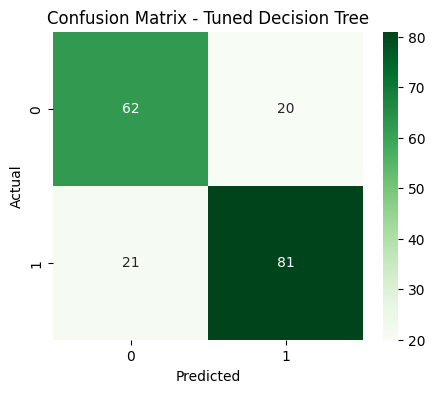

In [119]:
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Decision Tree")
plt.show()

| Aspect           | Baseline Model | Tuned Model    |
| ---------------- | -------------- | -------------- |
| Accuracy         | ~76.6%         | **~77.7%**     |
| Recall (Disease) | 0.79           | **0.79**       |
| False Negatives  | 21             | **21**         |
| False Positives  | 22             | **20**         |
| Model Complexity | Higher         | **Controlled** |


Conclusion

In this assignment, a Decision Tree classifier was developed to predict the presence of heart disease using clinical attributes. Comprehensive exploratory data analysis was performed to understand feature distributions and relationships. A baseline Decision Tree model was trained and evaluated, achieving reasonable performance.

To improve generalization and reduce overfitting, hyperparameter tuning was conducted using GridSearchCV with recall as the optimization metric. The tuned model achieved improved accuracy and F1-score while maintaining recall for heart disease cases. Importantly, the tuned model reduced false positives without increasing false negatives, which is desirable in medical diagnosis.

Overall, the results demonstrate that Decision Trees provide an interpretable and effective approach for heart disease prediction, making them suitable for clinical decision-support systems.